## This starts as the Matplotlib notebook but has other stuff added below.

In [1]:
%matplotlib inline


# Plot a confidence ellipse of a two-dimensional dataset

This example shows how to plot a confidence ellipse of a
two-dimensional dataset, using its pearson correlation coefficient.

The approach that is used to obtain the correct geometry is
explained and proved here:

https://carstenschelp.github.io/2018/09/14/Plot_Confidence_Ellipse_001.html

The method avoids the use of an iterative eigen decomposition algorithm
and makes use of the fact that a normalized covariance matrix (composed of
pearson correlation coefficients and ones) is particularly easy to handle.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

## The plotting function itself

This function plots the confidence ellipse of the covariance of the given
array-like variables x and y. The ellipse is plotted into the given
axes-object ax.

The radiuses of the ellipse can be controlled by n_std which is the number
of standard deviations. The default value is 3 which makes the ellipse
enclose 99.7% of the points (given the data is normally distributed
like in these examples).



In [3]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

## A helper function to create a correlated dataset

Creates a random two-dimesional dataset with the specified
two-dimensional mean (mu) and dimensions (scale).
The correlation can be controlled by the param 'dependency',
a 2x2 matrix.



In [4]:
def get_correlated_dataset(n, dependency, mu, scale):
    latent = np.random.randn(n, 2)
    dependent = latent.dot(dependency)
    scaled = dependent * scale
    scaled_with_offset = scaled + mu
    # return x and y of the new, correlated dataset
    return scaled_with_offset[:, 0], scaled_with_offset[:, 1]

## Positive, negative and weak correlation

Note that the shape for the weak correlation (right) is an ellipse,
not a circle because x and y are differently scaled.
However, the fact that x and y are uncorrelated is shown by
the axes of the ellipse being aligned with the x- and y-axis
of the coordinate system.



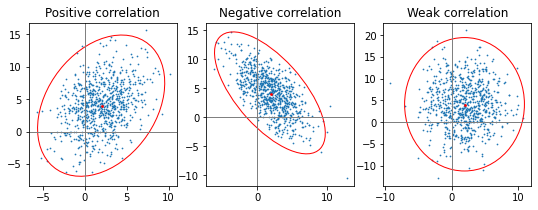

In [5]:
np.random.seed(0)

PARAMETERS = {
    'Positive correlation': [[0.85, 0.35],
                             [0.15, -0.65]],
    'Negative correlation': [[0.9, -0.4],
                             [0.1, -0.6]],
    'Weak correlation': [[1, 0],
                         [0, 1]],
}

mu = 2, 4
scale = 3, 5

fig, axs = plt.subplots(1, 3, figsize=(9, 3))
for ax, (title, dependency) in zip(axs, PARAMETERS.items()):
    x, y = get_correlated_dataset(800, dependency, mu, scale)
    ax.scatter(x, y, s=0.5)

    ax.axvline(c='grey', lw=1)
    ax.axhline(c='grey', lw=1)

    confidence_ellipse(x, y, ax, edgecolor='red')

    ax.scatter(mu[0], mu[1], c='red', s=3)
    ax.set_title(title)

plt.show()

## Different number of standard deviations

A plot with n_std = 3 (blue), 2 (purple) and 1 (red)



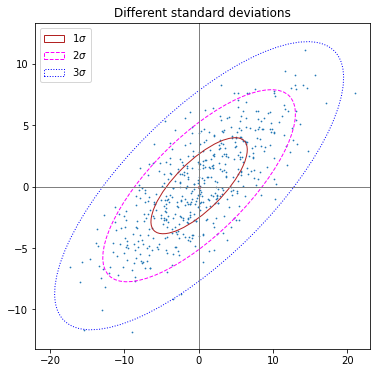

In [6]:
fig, ax_nstd = plt.subplots(figsize=(6, 6))

dependency_nstd = [[0.8, 0.75],
                   [-0.2, 0.35]]
mu = 0, 0
scale = 8, 5

ax_nstd.axvline(c='grey', lw=1)
ax_nstd.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_nstd, mu, scale)
ax_nstd.scatter(x, y, s=0.5)

confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')

ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()

## Using the keyword arguments

Use the kwargs specified for matplotlib.patches.Patch in order
to have the ellipse rendered in different ways.



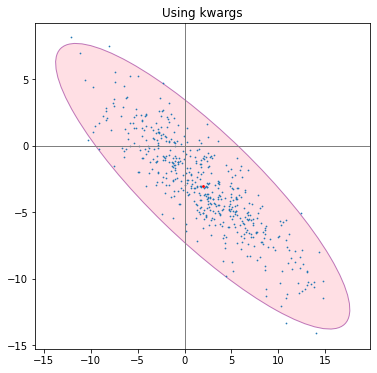

In [7]:
fig, ax_kwargs = plt.subplots(figsize=(6, 6))
dependency_kwargs = [[-0.8, 0.5],
                     [-0.2, 0.5]]
mu = 2, -3
scale = 6, 5

ax_kwargs.axvline(c='grey', lw=1)
ax_kwargs.axhline(c='grey', lw=1)

x, y = get_correlated_dataset(500, dependency_kwargs, mu, scale)
# Plot the ellipse with zorder=0 in order to demonstrate
# its transparency (caused by the use of alpha).
confidence_ellipse(x, y, ax_kwargs,
                   alpha=0.5, facecolor='pink', edgecolor='purple', zorder=0)

ax_kwargs.scatter(x, y, s=0.5)
ax_kwargs.scatter(mu[0], mu[1], c='red', s=3)
ax_kwargs.set_title('Using kwargs')

fig.subplots_adjust(hspace=0.25)
plt.show()


## Let's replicate this on a GP posterior.

So, it is the correlation between two random variables that is being plotted above.
We need to just use two test points below to compare with this.

In [35]:
import torch
from botorch import fit_gpytorch_model
from botorch.models import SingleTaskGP
from gpytorch import ExactMarginalLogLikelihood

model = SingleTaskGP(
    torch.rand(20, 2),
    torch.randn(20, 1),
)
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_model(mll)

/home/saitcakmak/anaconda3/envs/contextual_rs/lib/python3.8/site-packages/botorch/models/utils.py:189: InputDataWarning: Input data is not standardized. Please consider scaling the input to zero mean and unit variance.
  warnings.warn(msg, InputDataWarning)


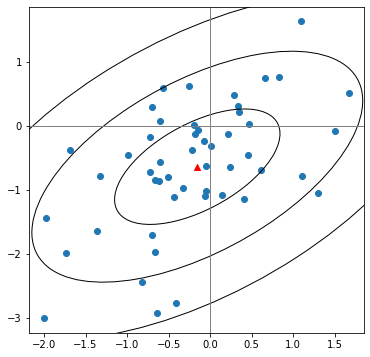

tensor([-0.1541, -0.6412])
tensor([[0.9925, 0.5132],
        [0.5132, 0.8124]])


In [51]:
with torch.no_grad():
    test_X = torch.rand(2, 2)
    post = model.posterior(test_X)
    mean = post.mean.squeeze(-1)
    covar = post.mvn.covariance_matrix

    samples = post.rsample(torch.Size([50])).squeeze(-1)

def sorted_eig(covar):
    lambda_, v = torch.symeig(covar, eigenvectors=True)
    order = lambda_.numpy().argsort()[::-1]
    return lambda_.numpy()[order], v.numpy()[:, order]

lambda_, v = sorted_eig(covar)
lambda_ = np.sqrt(lambda_)
theta = np.rad2deg(np.arctan2(*v[:,0][::-1]))
fig, ax = plt.subplots(figsize=(6, 6))

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

for j in range(1, 4):
    ell = Ellipse(
        xy=(mean[0], mean[1]),
        width=lambda_[0]*j*2, height=lambda_[1]*j*2,
        angle=theta, color="black"
    )
    ell.set_facecolor('none')
    ax.add_artist(ell)
ax.scatter(samples[..., 0], samples[..., 1])
ax.scatter(mean[0], mean[1], color="red", marker="^")
plt.show()

print(mean)
print(covar)

In [55]:
def mah_dist(delta, S):
    m = torch.dot(delta, torch.matmul(S.inverse(), delta))
    return m.sqrt()

assert mah_dist(
    torch.tensor([1, 1], dtype=torch.float), torch.eye(2, dtype=torch.float)
) == torch.tensor(2, dtype=torch.float).sqrt()

In [86]:
proj_mean = mean.clone()
proj_mean[0] = 0.

m_dist = mah_dist(proj_mean, covar)
print(f"Euc dist {proj_mean[1].abs()}, mah dist {m_dist}")

Euc dist 0.6411978006362915, mah dist 0.8669169545173645


In [87]:
covar

tensor([[0.9925, 0.5132],
        [0.5132, 0.8124]])

In [88]:
covar.inverse()

tensor([[ 1.4962, -0.9452],
        [-0.9452,  1.8280]])

In [89]:
covar * covar.inverse()

tensor([[ 1.4850, -0.4850],
        [-0.4850,  1.4850]])

In [59]:
mah_dist(
    torch.tensor([1, 1], dtype=torch.float), torch.eye(2, dtype=torch.float)
)

tensor(1.4142)

In [60]:
mah_dist(
    torch.tensor([1, 1], dtype=torch.float), 2 * torch.eye(2, dtype=torch.float)
)

tensor(1.)

In [61]:
torch.det(2*torch.eye(2))

tensor(4.)

Below two cells verify that the Mahalanobis distance is shorter in the direction where
the covariance is more spread out. So, we would have to travel further in this
direction to have significant change.

Note: results will depend on the random covariance matrix generated above.

In [62]:
d = torch.tensor([1, 1], dtype=torch.float)
mah_dist(d, covar)

tensor(1.1975)

In [64]:
d = torch.tensor([1, -1], dtype=torch.float)
mah_dist(d, covar)

tensor(2.2835)

Is the idea used in Li et al. a version of Mahalonobis distance for diagonal covariance
matrices? The analysis so far suggests that this is the case.

An important question is "how does the determinant of the covar play into the equation".

Let's first check if the idea in Li et al. actually corresponds to the Mahalanobis
distance. For this, we will make up some random mean and covariance.

In [78]:
m_ = torch.rand(5)
c_ = torch.rand(5)

m_, idx = m_.sort(descending=True)
c_ = c_[idx]

m_diff = m_[0].expand(4) - m_[1:]
c_diff = c_[0].expand(4) + c_[1:]

normalized = m_diff / c_diff.sqrt()
print(normalized)

tensor([0.0545, 0.0805, 0.2266, 0.3757])


This here is the mah dist to the mean of the difference, which is not what we're
looking for.

In [79]:
mah_dist(m_diff, c_diff.diag())

tensor(0.4494)

Let's just calculate in a for loop for now.

Looks like it does correspond to the Mahalanobis distance between the mean diff vector
and each of the axes.

In [80]:
[mah_dist(d, c_diff.diag()) for d in m_diff.diag()]

[tensor(0.0545), tensor(0.0805), tensor(0.2266), tensor(0.3757)]

In [81]:
c_diff.diag().inverse()

tensor([[0.7433, 0.0000, 0.0000, -0.0000],
        [0.0000, 0.5451, 0.0000, -0.0000],
        [0.0000, 0.0000, 0.6815, -0.0000],
        [0.0000, 0.0000, 0.0000, 0.5670]])

Let's look into calculating the covariance matrix \Sigma_e from the notes.

We can implement this more efficiently than calculating naive matrix products with the
sparse matrices.

c_ above defines a diagonal covariance. For this to actually make sense, we should work
 with a proper covariance matrix. Let's use the model above to generate one.

Cov2 below is a 5x5 covariance matrix.

In [112]:
post2 = model.posterior(torch.rand(5, 2))
mean2 = post2.mean.squeeze(-1)
cov2 = post2.mvn.covariance_matrix

In [113]:
mean2, idx = mean2.sort(descending=True)

cov2 = cov2[idx][:, idx]

Next step is to expand the first rov / col of cov2 to get S_e.

In [118]:
cov20 = cov2[0]
cov20 = torch.cat([cov20[0].expand(4), cov20[1:]])
cov_upper = cov20.expand(4, -1)
cov_low_left = cov_upper[:, 4:].t()
cov_lower = torch.cat([cov_low_left, cov2[1:, 1:]], dim=-1)
S_e = torch.cat([cov_upper, cov_lower], dim=0)

Now that we have the expanded covariance, S_e, we can calculate the matrix products.

First A_e S_e product. This is equivalent to cov_upper - cov_lower.

The second one is A_e S_e A_e^{\top}. This is S_d, also easily calculated.

In [120]:
A_S = S_e[:4] - S_e[4:]

In [123]:
A_S_A = A_S[:, :4] - A_S[:, 4:]

In [125]:
S_d = A_S_A

One last step is to figure out how to calculate the minimum Mahalanobis distance with
batches of inputs.

For a vector input delta and simple matrix S, we can use the following.

In [127]:
delta = torch.rand(4)
S = S_d.clone()

m = torch.dot(delta, torch.matmul(S.inverse(), delta))

m.shape

torch.Size([])

This was a delta with all elements. Now, let's process each element individually.

In [132]:
delta = delta.diag()

torch.Size([4, 4])

In [136]:
m_list = [torch.dot(d, torch.matmul(S.inverse(), d)) for d in delta]

m_list

[tensor(0.6518, grad_fn=<DotBackward>),
 tensor(2.7486, grad_fn=<DotBackward>),
 tensor(0.0066, grad_fn=<DotBackward>),
 tensor(4.3084, grad_fn=<DotBackward>)]

In [137]:
m = delta.matmul(torch.matmul(S.inverse(), delta))

m

tensor([[ 6.5179e-01, -1.6229e-01, -1.4200e-02, -4.1329e-02],
        [-1.6229e-01,  2.7486e+00, -1.5564e-02, -3.2846e+00],
        [-1.4200e-02, -1.5564e-02,  6.6183e-03, -3.1667e-03],
        [-4.1329e-02, -3.2846e+00, -3.1667e-03,  4.3084e+00]],
       grad_fn=<MmBackward>)

This gives us the right elements on the diagonal, but also occurs the cost of full
matrix multiplication. Can we utilize the fact that delta is diagonal to get around this?

In [140]:
S_inv = S.inverse()

S_inv

tensor([[  1.2044,  -0.6601,  -0.2473,  -0.1369],
        [ -0.6601,  24.6087,  -0.5965, -23.9510],
        [ -0.2473,  -0.5965,   1.0860,  -0.0989],
        [ -0.1369, -23.9510,  -0.0989,  25.5867]], grad_fn=<InverseBackward>)

In [143]:
m_simple = delta * S_inv * delta

m_simple

tensor([[0.6518, -0.0000, -0.0000, -0.0000],
        [-0.0000, 2.7486, -0.0000, -0.0000],
        [-0.0000, -0.0000, 0.0066, -0.0000],
        [-0.0000, -0.0000, -0.0000, 4.3084]], grad_fn=<MulBackward0>)

In [145]:
m_simpler = delta.diag() * S_inv.diag() * delta.diag()

m_simpler

tensor([0.6518, 2.7486, 0.0066, 4.3084], grad_fn=<MulBackward0>)

So, we can completely let go of the matrix multiplication. This is great!